# BACKGROUND

A taxi company operating in New York aims to enhance its customer service. To achieve this, they find it necessary to understand the performance of the taxi rental industry and assess customer satisfaction levels, particularly regarding the experience of using taxis in New York’s traffic conditions.








## PROBLEM STATEMENT

In the urban transportation industry, managing fares, travel time, and customer satisfaction are critical factors. Optimizing service efficiency, particularly in high-traffic areas and during peak hours, can enhance the customer experience and improve revenue management.

The company seeks to understand the impact of traffic congestion on customer satisfaction and identify potential opportunities for promotions, route optimization, or other strategies to enhance performance.

# **DATA UNDERSTANDING AND DATA CLEANING**

## IMPORTING THE DATABASE

In this, I will use the dataset from Google Drive.

We create first the code to access the dataset from GDrive

In [ ]:
import gdown
from io import BytesIO

In [ ]:
# IMPORTING USEABLE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Google Drive link
url = "https://drive.google.com/file/d/16AEYGzPnzwZWNKG-8Nfkn3r9pm4TG0kX/view?usp=sharing"

# Extracting file ID from URL
# File ID usually between the /d and /

file_id = url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# TEMPORARY FILE

output = "temp_dataset.csv"

# SAVING FILE TO LOCAL DIRECTORY
gdown.download(download_url, output, quiet=False)





Downloading...
From: https://drive.google.com/uc?id=16AEYGzPnzwZWNKG-8Nfkn3r9pm4TG0kX
To: /content/temp_dataset.csv
100%|██████████| 7.33M/7.33M [00:00<00:00, 34.4MB/s]


'temp_dataset.csv'

In [ ]:
# IMPORTING THE DATABASE

database = pd.read_csv(output)
display(database.head(),database.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## CHECKING THE DATABASE DIMENSIONS

In [ ]:
# CHECKING THE SHAPE OF THE DATASET

print(f'Number of rows in the database :  {database.shape}')
database.info()

Number of rows in the database :  (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fe

In [ ]:
display(database.describe(), database.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


## CALCULATING MISSING VALUES NUMBERS AND PERCENTAGE

Function to calculate missing values and their respective percentages for each

---

column

In [ ]:
# CALCULATE NUMBER OF MISSING VALUES

def missingvalues_calculation(datasets):
  number_missing = database.isnull().sum()

  percentage_missing = database.isna().sum()/database.shape[0]*100

  missing_values = pd.concat([number_missing, percentage_missing], axis = 1)
  missing_values.columns = ['Number_Missing', 'Percentage_Missing']

  return missing_values

In [ ]:
missingvalues_calculation(database)

,Number_Missing,Percentage_Missing
VendorID,0,0.000000
lpep_pickup_datetime,0,0.000000
lpep_dropoff_datetime,0,0.000000
store_and_fwd_flag,4324,6.339154
RatecodeID,4324,6.339154
PULocationID,0,0.000000
DOLocationID,0,0.000000
passenger_count,4324,6.339154
trip_distance,0,0.000000
fare_amount,0,0.000000


Since we don't use the ehail_fee in our database and our further analysis, we can drop this column from database

In [ ]:
database.drop(
    labels = ["ehail_fee"],
    axis = 1, #since we delete the column
    inplace = True
)

In [ ]:
# check again the database after dropping

missingvalues_calculation(database)

,Number_Missing,Percentage_Missing
VendorID,0,0.000000
lpep_pickup_datetime,0,0.000000
lpep_dropoff_datetime,0,0.000000
store_and_fwd_flag,4324,6.339154
RatecodeID,4324,6.339154
PULocationID,0,0.000000
DOLocationID,0,0.000000
passenger_count,4324,6.339154
trip_distance,0,0.000000
fare_amount,0,0.000000


Text(0.5, 1.0, 'Missing Values Heatmap')

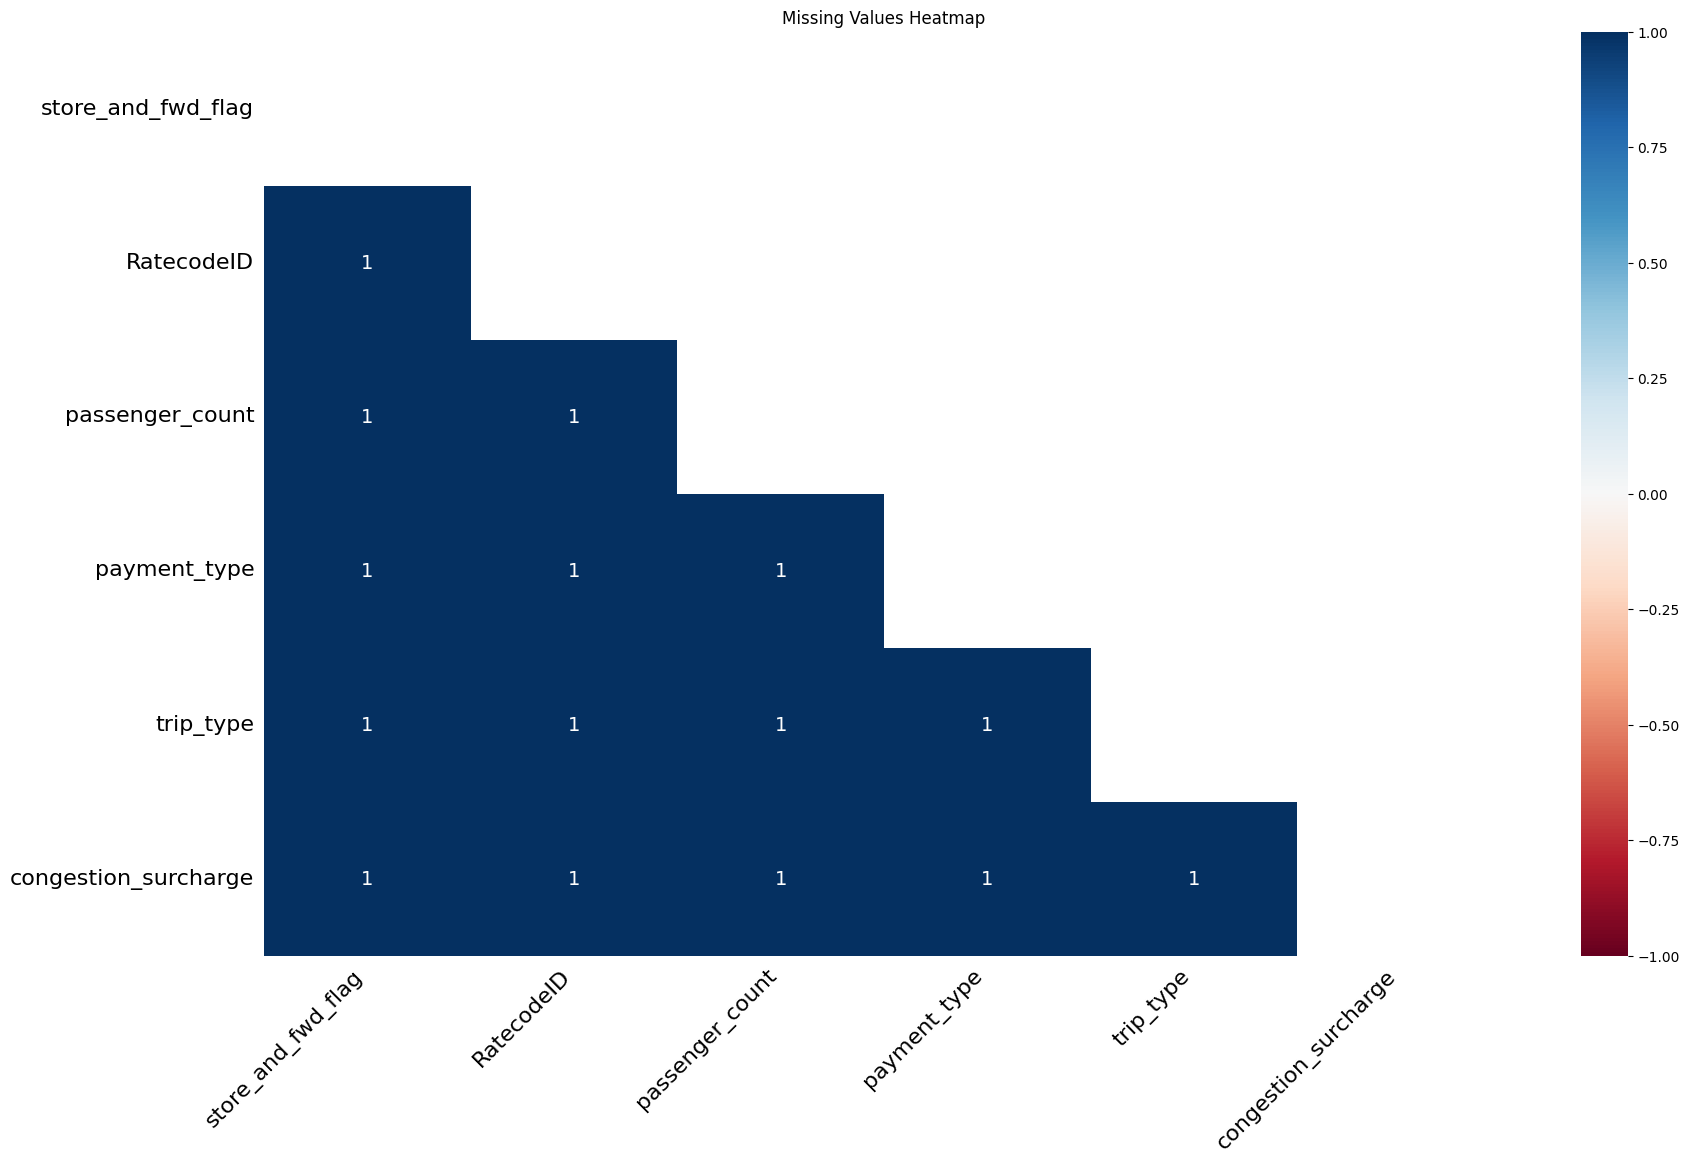

In [ ]:
# CREATING HEAT MAP
# THIS WILL HELP US TO SEE RELATION BETWEEN MISSING VALUES FOR EACH COLUMNS
import missingno as msno
msno.heatmap(database)
plt.title('Missing Values Heatmap')

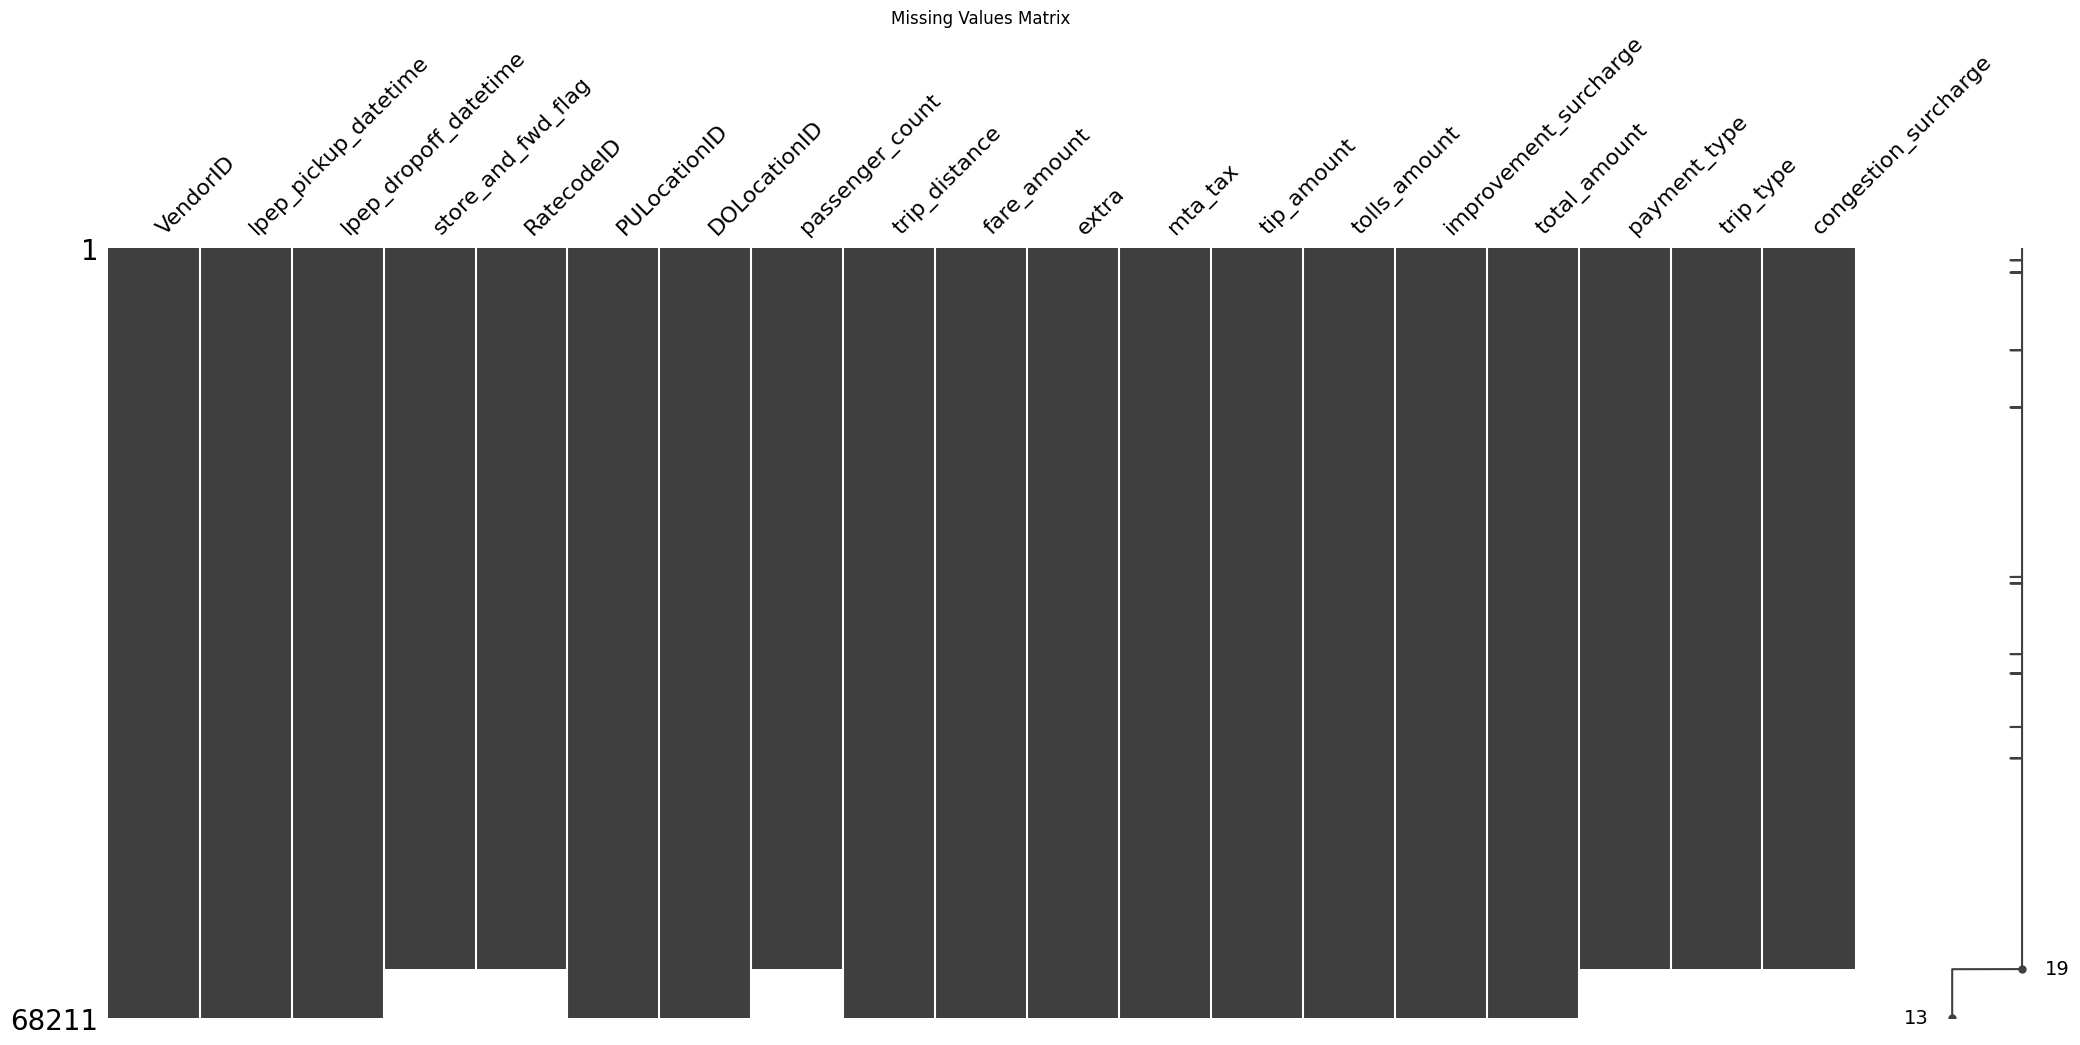

In [ ]:
msno.matrix(database)
plt.title('Missing Values Matrix')
plt.show()

## CHECKING UNIQUE DATA FOR EACH COLUMNS

In [ ]:
# SHOWING UNIQUE DATA FOR EACH COLUMN

pd.set_option('display.max_colwidth', 1)

# unique data for each column
listItem = []
for col in database.columns :
    listItem.append( [col, database[col].nunique(), database[col].unique()])

unique_data = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_data

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

## DATA CLEANING TO DO SUMMARY

Based on the dataset provided, we can check for the needs for the data cleaning, including several considerations as follows :

1. ***Vendor ID*** shows no need for cleaning as there's no NA values and no anomalies (all options are only 1 or 2) and the data type is correct as 'Int'.

2. ***lpep_pickup_datetime*** shows no need for cleaning as there's no NA valeus and no anomailes, also the data type is correct as 'object'.

3. ***lpep_dropoff_datetime*** shows no need for cleaning as there's no NA values and no anomalies, also the data type is correct as 'object'.

4. ***store_and_fwd_flag***, *needs to clean the NA values*, but the data type is already correct as 'object'.

5. ***RatecodeID*** needs to clean NA values, evaluate the '99' (since there is no 99 code) and need to change type to be 'Int'.

6. ***PULocationID*** shows no need for cleaning, no anomalies and the data type is correct as 'Int'.

7. ***DOLocationID*** shows no need for cleaning, no anomalies, and the data type is correct as 'Int'.

8. ***passenger_count*** needs to clean NA values, non anomalis, need to change data from 'float' become 'Int' as this variable denotes the number of passenger (humans)

9. ***trip_distance*** shows no need for cleaning, non NA and anomalies, and the data type is correct as 'float'.

10. ***fare_amount*** shows no need for cleaning the NA values, and the data type is correct as 'float', but need to ensure the number is positive.

11. ***extra shows*** no need for cleaning NA values, and the data type is correct as 'float', but need to ensure the number is positive.

12. ***mta_tax*** shows no need for cleaning NA values, and the data type is correct as 'float', but need to ensure the number is positive.

13. ***tip_amount*** shows no need for cleaning NA values, and the data type is correct as 'float', but need to ensure the number is positive.

14. ***tolls_amount*** shows no need for cleaning NA values, no anomalies, and the data type is correct as 'float', but need to ensure the number is positive.

15. ***improvement_surcharge*** shows no need for cleaning NA values, no anomalies, data type is correct as 'float', but need to ensure the number is positive.

16. ***total_amount shows***  shows no need for cleaning NA values, no anomalies, and the data type is correct as 'float', but need to ensure the number is positive.

17. ***payment_type*** needs to clean up the NA values, no anomalies, data type is correct as 'float', but need to ensure the number is positive.

18. ***trip_typ***e needs to clean up the NA values, no anomalies, data type is already correct as 'float', but need to ensure the number is positive.

19. ***congestion_surcharge*** needs to clean up the NA values, no anomalies, data type is already correct as 'float', but need to ensure the number is positive.

## DATA CLEANING PROCESSES

### 1. TURNING THE INT AND FLOAT DATA BECOME POSITIVE NUMBERS

We need to make sure all the columns with data type float or integer become positive, since the groupings, tax, and fares have no negative values

In [ ]:
# CODE TO MAKE BECOME ABSOLUTE VALUE FOR EACH COLUMN WITH TYPE INTEGER OR FLOAT


for col in database.columns :
  if (database[col].dtype == 'int64') or (database[col].dtype == 'float64') :
    database[col] = database[col].abs()
  else :
    continue

In [ ]:
# CHECK THE PROCESS

for col in database.columns :

  if (database[col].dtype == 'int64') or (database[col].dtype == 'float64') :

    negative_count = (database[col] < 0).sum()
    print(f'We found {negative_count} negative values in column {col}.')

We found 0 negative values in column VendorID.
We found 0 negative values in column RatecodeID.
We found 0 negative values in column PULocationID.
We found 0 negative values in column DOLocationID.
We found 0 negative values in column passenger_count.
We found 0 negative values in column trip_distance.
We found 0 negative values in column fare_amount.
We found 0 negative values in column extra.
We found 0 negative values in column mta_tax.
We found 0 negative values in column tip_amount.
We found 0 negative values in column tolls_amount.
We found 0 negative values in column improvement_surcharge.
We found 0 negative values in column total_amount.
We found 0 negative values in column payment_type.
We found 0 negative values in column trip_type.
We found 0 negative values in column congestion_surcharge.


### 2. IMPUTATION FOR ***'store_and_fwd'***

First we will impute the store_and_fwd variable, since this variable is not directly related to any other variables.

Because this variable is categorical, we will use Mode to impute the NaN

In [ ]:
# SHOW THE N/A store_and_fwd

null_store_and_fwd = database[database['store_and_fwd_flag'].isna()]

k = null_store_and_fwd['store_and_fwd_flag'].isna().count()

print('number of null data {}'.format(k))
print('\n')
display(null_store_and_fwd.head(), null_store_and_fwd.tail())

number of null data 4324




,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,1.0,29.40,NaN,NaN,NaN


In [ ]:
# IMPUTATING THE STORE_AND_FWD_FLAG USING THE MODE
mode_value = database['store_and_fwd_flag'].mode()[0]
database['store_and_fwd_flag'].fillna(mode_value, inplace=True)

In [ ]:
# CHECK THE DATABASE AFTER IMPUTATION


null_store_and_fwd = database[database['store_and_fwd_flag'].isna()]

k = null_store_and_fwd['store_and_fwd_flag'].isna().count()

print('number of null data {}'.format(k))

number of null data 0


In [ ]:
display(database.head(), database.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,1.0,29.40,NaN,NaN,NaN


### 3. IMPUTATION FOR ***'trip_type'***

Trip Type can determine the 'improvement_surcharge' where this charge is applied if the trip type is hailed.

So when trip_type = 1 (hailed) we expect the value of improvement surcharge, and when trip_type = 2 (dispatch), no improvement surcharge


The improvement surcharge before is 0.3, but effectively from Sep22, the surcharge icreased become 1.0

https://rules.cityofnewyork.us/rule/taximeter-rate-of-fare-and-various-surcharges/

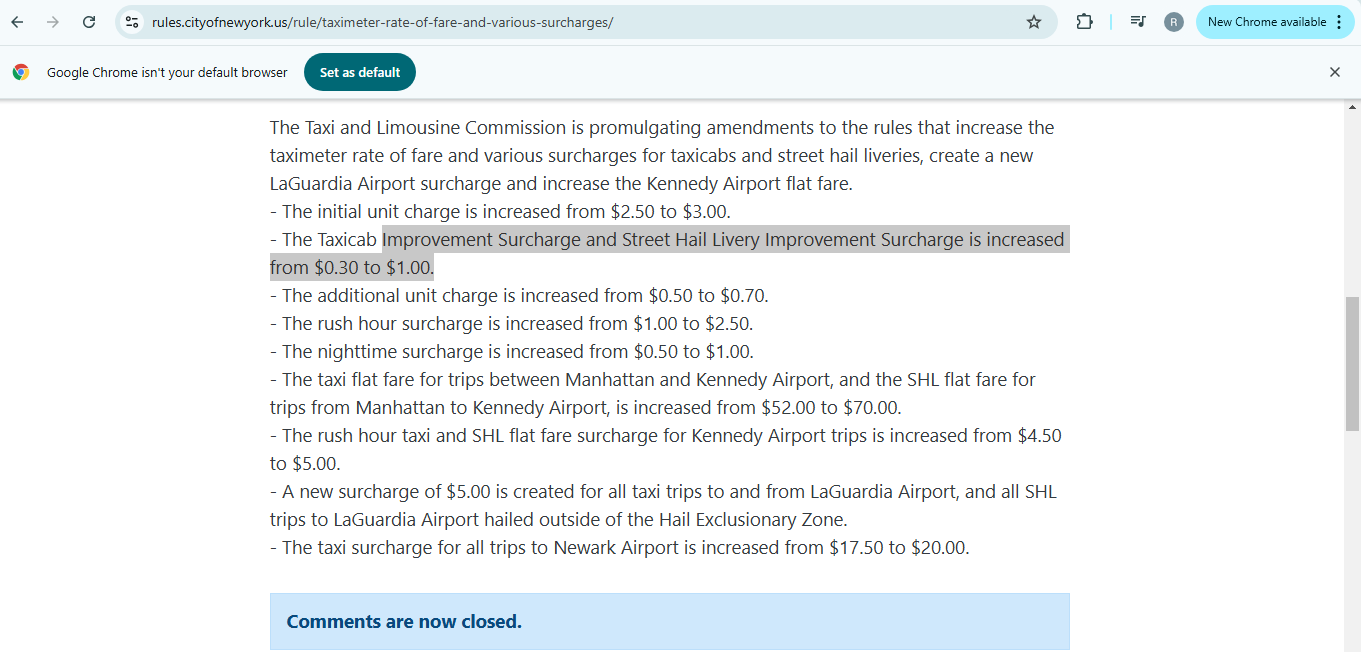

Thus we expect both 0.3 and 1.0 in the database.

This surchage number will be our guide when deciding the trip_type

If we found the surcharge than the trip_type = 1
otherwise, the trip_type = 2

In [ ]:
display(database[database['improvement_surcharge'] == 0.3].head(), database[database['improvement_surcharge'] == 0.3].tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
32,2,2023-01-01 00:40:58,2023-01-01 01:04:32,N,5.0,66,164,4.0,6.78,60.0,0.0,0.0,12.61,0.0,0.3,75.66,1.0,2.0,2.75
41,2,2023-01-01 00:08:05,2023-01-01 00:13:26,N,1.0,41,75,6.0,1.05,5.5,0.5,0.5,1.36,0.0,0.3,8.16,1.0,1.0,0.00
43,2,2023-01-01 00:16:10,2023-01-01 00:54:55,N,5.0,66,48,3.0,6.19,75.0,0.0,0.0,0.00,0.0,0.3,78.05,2.0,2.0,2.75
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.00,3.0,1.0,0.5,21.50,0.0,0.3,26.30,1.0,1.0,0.00
147,2,2023-01-01 02:01:43,2023-01-01 02:03:43,N,5.0,179,7,1.0,0.32,25.0,0.0,0.0,6.32,0.0,0.3,31.62,1.0,2.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
67992,2,2023-01-30 10:58:00,2023-01-30 11:26:00,N,NaN,168,43,NaN,4.22,22.25,0.0,0.0,0.00,6.55,0.3,29.10,NaN,NaN,NaN
68056,2,2023-01-30 17:54:00,2023-01-30 18:22:00,N,NaN,42,232,NaN,9.27,37.72,0.0,0.0,8.44,0.00,0.3,49.21,NaN,NaN,NaN
68062,2,2023-01-30 18:44:00,2023-01-30 18:56:00,N,NaN,198,112,NaN,2.76,14.87,0.0,0.0,0.00,0.00,0.3,15.17,NaN,NaN,NaN
68094,2,2023-01-31 07:15:00,2023-01-31 07:44:00,N,NaN,33,246,NaN,5.27,21.65,0.0,0.0,2.60,0.00,0.3,27.30,NaN,NaN,NaN
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.00,0.3,25.02,NaN,NaN,NaN


In [ ]:
null_trip = database['trip_type'].isna().sum()
print('number of trip with null before imputation: {}'.format(null_trip))

number of trip with null before imputation: 4334


If the trip_type = 2, then the improvement_surcharge should be 0

In [ ]:
database.loc[database['trip_type'] == 2, 'improvement_surcharge'] = 0

Inversely, if the improvement_surcharge = 0, the trip_type should be 2

In [ ]:
database.loc[database['improvement_surcharge'] == 0, 'trip_type'] = 2

If the data have improvement_charge, than the trip_type is 1

In [ ]:
database.loc[database['trip_type'].isna() & database['improvement_surcharge'].notna(), 'trip_type'] = 1

In [ ]:
null_trip = database['trip_type'].isna().sum()
print('number of trip with null after imputation: {}'.format(null_trip))

number of trip with null after imputation: 0


In [ ]:
# check the trip_type

# TO CHECK THE NUMBER OF TRIP_TYPE 1 AND 2


trip_type_number = database['trip_type'].value_counts()
trip_type_number

,count
trip_type,
1.0,66698
2.0,1513


In [ ]:
# CHECK THE DATA FOR IMPROVEMENT SURGE, WITH TRIP = 1

# THE COUNT NUMBER SHOULD BE ADD UP WITH COUNT OF TRIP_TYPE ABOVE

df_trip1 = database[database['trip_type'] == 1][['trip_type', 'improvement_surcharge']]
df_trip1['improvement_surcharge'].value_counts()

,count
improvement_surcharge,
1.0,62958
0.3,3740


The total of both 1.0 and 0.3 is 66698, add up with the above value.

In [ ]:
# CHECK THE DATA FOR IMPROVEMENT SURGE, WITH TRIP = 2

# THE COUNT NUMBER SHOULD BE ADD UP WITH COUNT OF TRIP_TYPE ABOVE

df_trip2 = database[database['trip_type'] == 2][['trip_type', 'improvement_surcharge']]
df_trip2['improvement_surcharge'].value_counts()

,count
improvement_surcharge,
0.0,1513


When trip = 2, thus the improvement_surcharge must be 0, and the number of 0 values is the same with the above data.


### IMPUTATION FOR **'passenger_count'**

Passenger number is related to the Ratecode, if we refer back to the database dictionary, where there's is Ratecode = 6 for group ride (sharing ride)

However, before we proceed further, we will the distribution between number of passenger and ratecode used

We will see the distribution of Passenger and Rate Code as :

In [ ]:
for i in sorted(database['passenger_count'].unique()):
  for j in sorted(database[database['passenger_count'] == i]['RatecodeID'].unique()):
    summ = len(database[(database['passenger_count'] == i) & (database['RatecodeID'] == j)])
    print('Passenger : {} | Ratecode : {} | numbers : {}'.format(i,j,summ))

Passenger : 0.0 | Ratecode : 1.0 | numbers : 311
Passenger : 0.0 | Ratecode : 5.0 | numbers : 25
Passenger : 1.0 | Ratecode : 1.0 | numbers : 52896
Passenger : 1.0 | Ratecode : 2.0 | numbers : 125
Passenger : 1.0 | Ratecode : 3.0 | numbers : 23
Passenger : 1.0 | Ratecode : 4.0 | numbers : 44
Passenger : 1.0 | Ratecode : 5.0 | numbers : 1201
Passenger : 1.0 | Ratecode : 99.0 | numbers : 10
Passenger : 2.0 | Ratecode : 1.0 | numbers : 4865
Passenger : 2.0 | Ratecode : 2.0 | numbers : 18
Passenger : 2.0 | Ratecode : 3.0 | numbers : 5
Passenger : 2.0 | Ratecode : 4.0 | numbers : 8
Passenger : 2.0 | Ratecode : 5.0 | numbers : 200
Passenger : 3.0 | Ratecode : 1.0 | numbers : 889
Passenger : 3.0 | Ratecode : 2.0 | numbers : 4
Passenger : 3.0 | Ratecode : 3.0 | numbers : 1
Passenger : 3.0 | Ratecode : 4.0 | numbers : 4
Passenger : 3.0 | Ratecode : 5.0 | numbers : 60
Passenger : 4.0 | Ratecode : 1.0 | numbers : 339
Passenger : 4.0 | Ratecode : 2.0 | numbers : 2
Passenger : 4.0 | Ratecode : 5.0 

Based on the distribution check, we can observe, apart from ratecode 99 that we will clean up soon, we see little to none relation between passenger number > 1 with the usage of ratecodeid = 6

Hence, we can impute the passenger_count statistically.

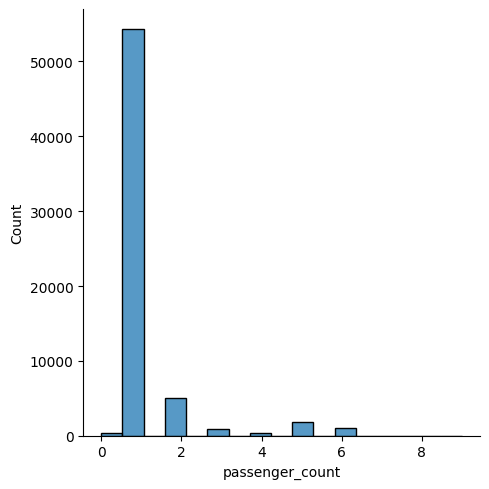

In [ ]:
# CHECK THE DISTRIBUTION OF PASSENGER NUMBER VISUALLY
sns.displot(data = database['passenger_count'])

From data we can see that the data is heavily skewed to passenger_count = 1, thus we will impute the missing values with ***mode***

In [ ]:
# SHOW THE N/A for passenger_count

null_passenger_count = database[database['passenger_count'].isna()]

l = null_passenger_count['passenger_count'].isna().count()

print('number of null data {}'.format(l))
print('\n')
display(null_passenger_count.head(), null_passenger_count.tail())

number of null data 4324




,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,1.0,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,1.0,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,1.0,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,1.0,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,1.0,NaN


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,1.0,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,1.0,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,1.0,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,1.0,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,1.0,29.40,NaN,1.0,NaN


In [ ]:
# IMPUTATING THE PASSENGER_COUNT USING THE MODE

mode_passenger = database['passenger_count'].mode()[0]
database['passenger_count'].fillna(mode_passenger, inplace=True)

In [ ]:
# CHECK THE DATABASE AFTER IMPUTATION


null_passenger = database[database['passenger_count'].isna()]

l = null_passenger['passenger_count'].isna().count()

print('number of null data {}'.format(l))

number of null data 0


Change database column from 'float' become 'integer' as this column denotes the number of humans

In [ ]:
# CODE TO CHANGE TYPE OF PASSENGER_COUNT FROM FLOAT BECOME INTEGER

database['passenger_count'] = database['passenger_count'].astype(int)

### IMPUTATION FOR **'RatecodeID'**

RATE CODE ID, THIS VARIABLE IS DEFINED BY THE DIRECTION WHERE THE TAXI HEADING



---


With detail as :

1 = Standard rate

2 =JFK

3 =Newark

4 =Nassau or Westchester

5 =Negotiated fare

6 =Group ride (share ride)



---



In [ ]:
cek = database['RatecodeID'].value_counts()
cek

,count
RatecodeID,
1.0,62103
5.0,1529
2.0,158
4.0,57
3.0,30
99.0,10


However, ratecode is not only related to direction, but also the numbers of passengers (option 5 and 6). Where grouped passengers could negotiate (5) the price or share the ride (6).


If we exclude the 5, 6 or 99 (not directional related) we can see that **91.4 % of the ratecode related with the directions (option 1 - 4) and not the passengers**.

*Indicatively no correlation between number of passengers and the ratecode*


We will check this hypothesis via correlation testing and scatter plot

In [ ]:
correlation = database[['passenger_count', 'RatecodeID']].corr().iloc[0, 1]
print("correlation coefficient : {}".format(correlation))

correlation coefficient : -0.004009286995993267


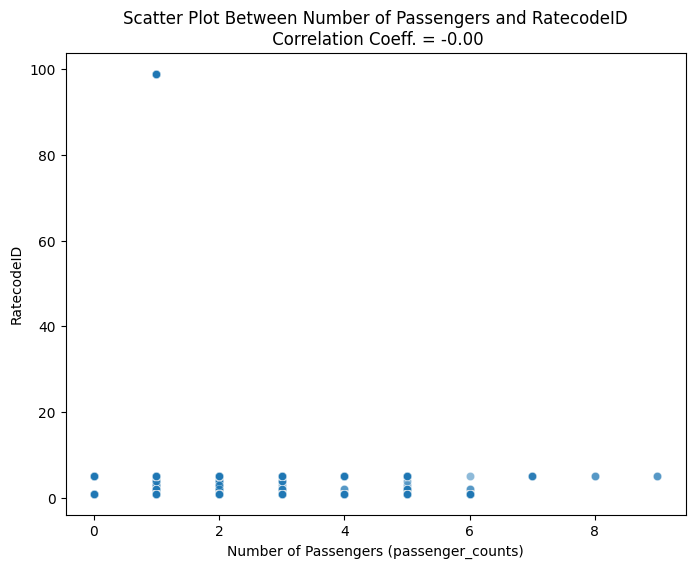

In [ ]:
#PLOT THE SCATTER PLOT
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=database, x='passenger_count', y='RatecodeID', alpha=0.5)
plt.title(f'Scatter Plot Between Number of Passengers and RatecodeID\n Correlation Coeff. = {correlation:.2f}')
plt.xlabel('Number of Passengers (passenger_counts)')
plt.ylabel('RatecodeID')
plt.show()

From the scatter plot and correlation coefficient, ***we can conclude that RatecodeID is less likely affected by the number of passengers.***

*We can impute the RatecodeID independently*

**STATISTICAL IMPUTATION FOR RATECODEID**

We will map the DOLocationID to their most probable RatecodeID



*   Find the frequency  of RatecodeID per DOLocationID

*  Find the highest frequency for of RatecodeID for each DOLocationID

*   These pairs saved as dictionary
*   We will get the RatecodeID for each DOLocationID

This dictionary will be used to impute the NA for RatecodeID based on their DOLocationID





In [ ]:
# NUMBER OF MISSING VALUES FOR RatecodeID

null_ratecode = database['RatecodeID'].isna().sum()

null_ratecode

4324

In [ ]:
# Step 1: Calculate the frequency of RatecodeID per DOLocationID
freq_table = database.groupby(['DOLocationID', 'RatecodeID']).size().reset_index(name='count')

# Step 2: Find the highest frequency of RatecodeID for each DOLocationID
most_common_ratecode = freq_table.sort_values('count', ascending=False).drop_duplicates('DOLocationID')

# Step 3: Saving these pairs in dictionary, used for imputation reference
ratecode_dict = most_common_ratecode.set_index('DOLocationID')['RatecodeID'].to_dict()



In [ ]:
# Step 4: Imputing the missing values of RatecodeID using the dictionary
database['RatecodeID'] = database['RatecodeID'].fillna(database['DOLocationID'].map(ratecode_dict))

In [ ]:
# WE WILL ALSO CLEAN UP THE DATA WITH '99' VALUES WITH IMPUTATION

mask = database['RatecodeID'] == 99
database.loc[mask, 'RatecodeID'] = database.loc[mask, 'DOLocationID'].map(ratecode_dict)

Check the imputation output

We will check two imputation results


1.   Whether the 99 already changed
2.   Whether the NA imputed



In [ ]:
# CHEC FOR THE UNIQUE VALUE

# TO SEE, WHETHER ALL 99 ALREADY IMPUTED

database['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,66429
5.0,1531
2.0,158
4.0,57
3.0,34


All 99 succesfully changed to new RatecodeID mapped based on their DOLocationID

In [ ]:
#NUMBER OF MISSING VALUES FOR RatecodeID

null_ratecode = database['RatecodeID'].isna().sum()

print("Number of missing values for RatecodeID after imputation {}".format(null_ratecode))

Number of missing values for RatecodeID after imputation 2


We have two remaining/residue that can't changed using the dictionary

We can drop these values

In [ ]:
database = database.dropna(subset=['RatecodeID'])

In [ ]:
#NUMBER OF MISSING VALUES FOR RatecodeID after drop NA

null_ratecode = database['RatecodeID'].isna().sum()

print("Number of missing values for RatecodeID after drop NA : {}".format(null_ratecode))

Number of missing values for RatecodeID after drop NA : 0


### CLEANING AND IMPUTATION FOR **'payment_type'**

In the begining of the data cleaning section, we observed that some data have **passenger_count = 0**

*Zero passenger means the transaction was canceled*

We try to check the sample time data, for transactions with
0 passengers

In [ ]:
# CHECKING THE DATA FOR TRANSACTION WITH 0 PASSENGERS

database[database['passenger_count'] == 0][['passenger_count','lpep_pickup_datetime', 'lpep_dropoff_datetime', 'payment_type']]

,passenger_count,lpep_pickup_datetime,lpep_dropoff_datetime,payment_type
99,0,2023-01-01 01:27:36,2023-01-01 01:27:43,1.0
254,0,2023-01-01 04:21:35,2023-01-01 04:30:00,1.0
446,0,2023-01-01 11:42:13,2023-01-01 11:49:21,1.0
486,0,2023-01-01 12:11:05,2023-01-01 12:20:45,1.0
487,0,2023-01-01 12:56:11,2023-01-01 13:01:06,1.0
...,...,...,...,...
63239,0,2023-01-31 18:27:02,2023-01-31 18:27:08,2.0
63247,0,2023-01-31 18:01:21,2023-01-31 18:09:22,1.0
63288,0,2023-01-31 18:07:39,2023-01-31 18:07:55,2.0
63420,0,2023-01-31 18:32:09,2023-01-31 18:32:33,3.0


From this view, we can see that the periods for 0 passengers mostly short time period, confirming our hypothesis that these transactions are canceled transactions

However, these canceled transactions still have payment_type other than 6 (for canceled transaction)

We need to change them become 6

In [ ]:
# CHANGE ALL PAYMENT TYPE BECOME 6 IF PASSENGER IS 0

database.loc[database['passenger_count'] == 0, 'payment_type'] = 6

In [ ]:
database['payment_type'].value_counts()

,count
payment_type,
1.0,40469
2.0,22524
3.0,462
6.0,336
4.0,94
5.0,2


We can see now, we have the payment_type = 6 after changing the the data of 0 passenger

In [ ]:
# CHECKING MISSING VALUES FOR CANCELED TRANSACTION

database[database['passenger_count'] == 0]['payment_type'].isna().sum()

0

***IMPUTING THE MISSING VALUES***

After changing the 0 passengers payment_type become 6, the next step is to impute the missing values

In [ ]:
# CHECK THE NUMBER OF MISSING VALUES

null_payment = database['payment_type'].isna().sum()

print("Number of missing payment_type : {}".format(null_payment))

Number of missing payment_type : 4322


In [ ]:
database[database['payment_type'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,1.0,7,17,1,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,1.0,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,1.0,37,37,1,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,1.0,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,1.0,80,7,1,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,1.0,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,1.0,169,42,1,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,1.0,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,1.0,42,262,1,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,1.0,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,1.0,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,1.0,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,1.0,NaN


In [ ]:
correlation = database[['payment_type', 'tip_amount']].corr().iloc[0, 1]
print("correlation coefficient : {}".format(correlation))

correlation coefficient : -0.41626643623506143


PAYMENT_TYPE related to the TIP_AMOUNT

As the tip_amount only recorded for transaction with Credit Card (payment_type = 1), while for other payment types the tip will be 0

Based on this information we will have the logic flow for NA and Not NA payment_type

FOR PAYMENT_TYPE NOT NA :  

*   If payment_type = 1 :

  *   If tip_amount = 0, correct, since user may not give the tip
  *   If tip_amount ≠ 0, correct, since the tip recorded


 \

*   If payment_type ≠ 1, :

  *   If tip_amount = 0, correct, because tip should not recorded
  *   If tip_aoumt ≠ 0, wrong,  turn data become 0









In [ ]:
# Loop untuk memeriksa setiap baris dalam dataframe hanya pada kolom 'tip_amount' dan 'payment_type'
for index, row in database[['tip_amount', 'payment_type']].iterrows():
    # Memastikan payment_type bukan NA
    if pd.notna(row['payment_type']):

        # Jika payment_type = 1
        if row['payment_type'] == 1:
            # Jika tip_amount = 0 atau tip_amount ≠ 0, diabaikan (tidak ada perubahan)
            pass

        # Jika payment_type bukan 1
        else:
            # Jika tip_amount ≠ 0, ubah menjadi 0
            if row['tip_amount'] != 0:
                database.at[index, 'tip_amount'] = 0

In [ ]:
# CODE TO CHEC IS THERE ANY UNIQUE VALUE OTHER THAN 0 FOR TIP_AMOUNT WHEN PAYMENT_TYPE IS NOT 1

# SHOULD BE ONLY ZERO

database[(database['payment_type']!=1) & (database['payment_type'].notna()) ]['tip_amount'].value_counts()

,count
tip_amount,
0.0,23418


In [ ]:
# CODE TO CHECK THE NUMBER OF ROWS/DATA WHEN PAYMENT_TYPE = 1 (CREDIT CARD)


database[database['payment_type']==1]['tip_amount'].value_counts().sum()

40469

In [ ]:
database['payment_type'].value_counts(dropna=False)

,count
payment_type,
1.0,40469
2.0,22524
NaN,4322
3.0,462
6.0,336
4.0,94
5.0,2


FOR NA :

*   If tip_amount ≠ 0, change NA become 1
*   If tip_amount = 0, need to do the statistical imputation



**IMPUTING NA WITH TIP_AMOUNT IS NOT 0**

In [ ]:
# IMPUTING, IF TIP IS NOT 0, CHANGE PAYMENT_TYPE BECOME 1

database.loc[database['payment_type'].isna() & (database['tip_amount'] != 0), 'payment_type'] = 1

In [ ]:
# CHECK THE NUMBER OF MISSING VALUES

null_payment = database['payment_type'].isna().sum()

print("Number of missing payment_type : {}".format(null_payment))

Number of missing payment_type : 493


**IMPUTING NA WITH TIP_AMOUNT IS 0**

If tip_amount = 0, there is wide probability that can fit in, from 1 (user didn't give tip) or others (2 - 6)

Because of this, we have several numbers of NA (493) that can't impute using relation with other variables, thus we will impute them using statistical imputing.

We will see the payment_type distribution and deciding the most probable one

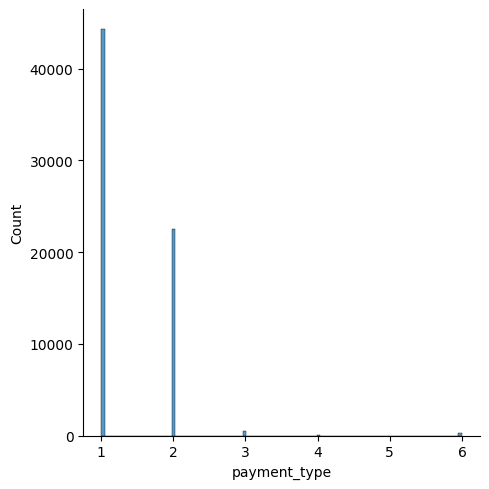

In [ ]:
# WE WILL SEE THE DISTRIBUTION OF PAYMENT_TYPE

sns.displot(data = database['payment_type'])

After seeing the distribution, we observe that 1 and 2 are two most frequent payment method.

Since in this NA, the tip_amount is 0, we may choose the payment_type = 2 (cash)

In [ ]:
# CODE TO IMPUTE NA WITH 2
# WHEN TIP_AMOUNT IS 0


database.loc[database['payment_type'].isna() & (database['tip_amount'] == 0), 'payment_type'] = 2

**POST IMPUTATION CHECK**

In [ ]:
# CHECK THE NUMBER OF MISSING VALUES

null_payment = database['payment_type'].isna().sum()

print("Number of missing payment_type : {}".format(null_payment))

Number of missing payment_type : 0


In [ ]:
database['payment_type'].value_counts()

,count
payment_type,
1.0,44298
2.0,23017
3.0,462
6.0,336
4.0,94
5.0,2


### IMPUTATION FOR **'congestion_surcharge'**

Because Congestion Surcharge not related with any other variables, we can directly impute them using statistical methods

Check the distribution and normalities of the congestion_surcharge

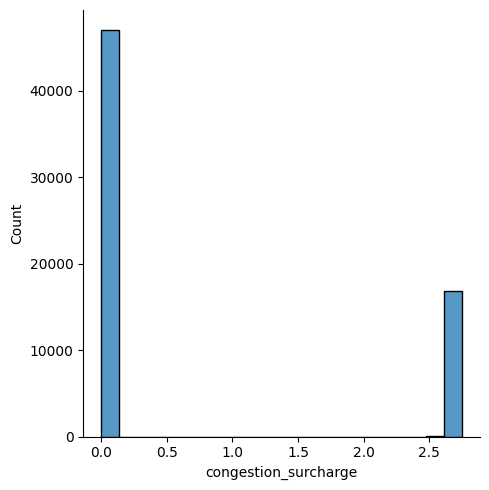

In [ ]:
#WE WILL SEE THE DISTRIBUTION OF PAYMENT_TYPE

sns.displot(data = database['congestion_surcharge'])

In [ ]:
# CHECKING FREQUENCY OF UNIQUE VALUES FOR CONGESTION_SURCHARGE

database['congestion_surcharge'].value_counts()

,count
congestion_surcharge,
0.00,46996
2.75,16875
2.50,16


Normality test, to check whether the data is normal or not (though we suggest it's not normal)

In [ ]:
from scipy.stats import shapiro

# Do the Shapiro-Wilk test for column 'congestion_surcharge'
stat, p_value = shapiro(database['congestion_surcharge'].dropna())

print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Checking the p-value

if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Shapiro-Wilk Test Statistic: 0.5503758219012842
p-value: 2.6999279427057023e-145
Data is not normally distributed


Since the data is not normally distributed and they tend to skewed to certain values.

***The most suitable imputation method is using the Mode***

In [ ]:
# IMPUTATING THE CONGESTION_SURCHARGE USING THE MODE

mode_congestion = database['congestion_surcharge'].mode()[0]
database['congestion_surcharge'].fillna(mode_congestion, inplace=True)

**POST IMPUTATION CHECK**

In [ ]:
# CHECK THE MISSING VALUE AND UNIQE VALUES

null_congestion = database['congestion_surcharge'].isna().sum()

print("Number of missing congestion_surcharge : {}".format(null_congestion))

Number of missing congestion_surcharge : 0


In [ ]:
database['congestion_surcharge'].value_counts()

,count
congestion_surcharge,
0.00,51318
2.75,16875
2.50,16


## UPDATING THE TOTAL_AMOUNT

Since we changed and/or impute the value of tips and congestion surcharge, we will need to update the total amount

In [ ]:
database['total_amount'] = database[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                                 'improvement_surcharge', 'congestion_surcharge']].sum(axis=1)

## DELETING DUPLICATE

In [ ]:
# FINDIN THE NUMBER OF DUPLICATE DATA

duplicate_rows = database.duplicated().sum()

print("We found {} duplicated data". format(duplicate_rows))

We found 174 duplicated data


In [ ]:
# DROP THE DUPLICATED DATA

database = database.drop_duplicates()

# **DATABASE CHECK AFTER CLEANING**

In [ ]:
database.shape

(68035, 19)

In [ ]:
missingvalues_calculation(database)

,Number_Missing,Percentage_Missing
VendorID,0,0.0
lpep_pickup_datetime,0,0.0
lpep_dropoff_datetime,0,0.0
store_and_fwd_flag,0,0.0
RatecodeID,0,0.0
PULocationID,0,0.0
DOLocationID,0,0.0
passenger_count,0,0.0
trip_distance,0,0.0
fare_amount,0,0.0


We have successfully imputed the missing values, checked the compliance between variables, and drop the duplicates

In [ ]:
database.to_csv('database_clean.csv', index=False)